### Creating a Polynomial Class

__Problem: For this question, you will define a class to represent a polynomial.__ For this class, you will use a list as a data member to represent the coefficients. The index of each coefficient in the list will be its corresponding power of x. For example, the coefficient list of the polynomial $p(x) = 2x^{4} - 9x^{3} + 7x + 3$ is [3, 7, 0, -9, 2].

index 0, coeff = 3 → $3x^{0}$. index 1, coeff = 7 → $7x^{1}$. index 2, coeff = 0 → $0x^{2}$. index 3, coeff = -9 → $−9x^{3}$. index 4, coeff = 2 → $2x^{4}$

Notice that $0x$ is included and that the coefficients in the list are in reversed order.

__Your class should include the following:__

__a) A constructor that takes a list as a parameter, and initiates a polynomial with coefficients as given in the list. If no list is given at construction, your polynomial should be p(x) = 0 . Name the list member variable self.data. You may assume that the last element in the list (representing the coefficient of the highest power), is not 0.__

Here, we should just define a parameter, data, to represent the list of coefficients. We initialize the list the constructor as [0] so that if no list is provided, the polynomial is just zero.

In [1]:
class Polynomial:
    def __init__(self, data = [0]):
        self.data = data

__b) An add operator that should take another polynomial object, and create a new polynomial object representing the sum of the two polynomials. Adding polynomials simply means adding their coefficients, but note that different polynomials might have different highest powers.__

When adding two polynomials, there are several cases we have to consider. The simplest case is if we have two polynomials of the same order. In terms of the code, this means that len(self.data) == len(other.data). This makes it easy to take the sum of the two polynomials because we can simply use a for loop to iterate through the lists using range(len(one of the lists)) and append the sum of the elements of the same index to a new list. We can then return a new Polynomial object with the list created as the coefficients. 

However, we also have to take into account the case where the polynomials differ in order. If self is of higher order than other, then len(self.data) > len(other.data). So, we should iterate through the length of the smaller list (other.data) when summing elements. After this, we can separately iterate through the remaining elements of the larger list (self.data) and append these to the new list (vice versa if len(other.data) > len(self.data)). Finally, we can return a new Polynomial object with the list created as the coefficients.

In [2]:
def __add__(self, other):
    sum_lst = []
    if len(self.data) > len(other.data):
        for i in range(len(other.data)):
            sum_lst.append(self.data[i] + other.data[i])
        for i in range(len(sum_lst), len(self.data)):
            sum_lst.append(self.data[i])
    else:
        for i in range(len(self.data)):
            sum_lst.append(self.data[i] + other.data[i])
        for i in range(len(sum_lst), len(other.data)):
            sum_lst.append(other.data[i])
    return Polynomial(sum_lst)

__c) A call operator that takes a number and returns the value of the polynomial for that number when evaluated. For instance, calling p(1) where p = Polynomial([3, 7, 0, -9, 2]) should return 3 because $2(1)^{4}$ - $9(1)^{3}$ + 7(1) + 3 = 3.__

To do this, we can define a variable, val, to represent the value of the polynomial when evaluated. Then, we can iterate through the elements of self.data (coefficients) and multiply the coefficient by the given number (num) raised to the power of the index of the coefficient. We can add this value to val and when the loop is finished running, we return val.

In [3]:
import math 

def __call__(self, num):
    val = 0
    for i in range(len(self.data)):
        val += self.data[i] * (math.pow(num, i))
    return val

__d) A repr operator, that returns a str representation of a polynomial in the format presented above. Instead of superscript, we will represent powers using the caret symbol ^ . You may format it as such: p(x) = $2x^{4}$ - $9x^{3}$ + 7x + 3__ __→ 2x^4 + -9x^3 + 0x^2 + 7x^1 + 3x^0__

We can initialize an empty list to represent the terms of the polynomial. Then we can iterate through the elements of the list of coefficients and append each element as a string with its x term attached. Finally, we can return the string representation of the polynomial by using join.

In [4]:
def __repr__(self):
    print_lst = []
    for i in range(len(self.data) - 1, -1, -1):
        print_lst.append(str(self.data[i]) + "x^" + str(i))
    return ' + '.join(print_lst)

__e) A mul operator. The operator should take another polynomial object, and create a new polynomial object representing the multiplication of the two polynomials. To multiply polynomials, multiply all pairs of coefficients from both lists, and group the ones of the same order. For example: ($5x^{2}$ + x) * ($2x^{8}$ + $3x^{2}$ + x) = $10x^{10}$ + $15x^{4}$ + $5x^{3}$ + $2x^{9}$ + $3x^{3}$ + $x^{2}$ = $10x^{10}$ + $2x^{9}$ + $15x^{4}$ + $8x^{3}$ + $x^{2}$.__

When we multiply two polynomials, we use a somwehat extended version of the FOIL method as shown below:

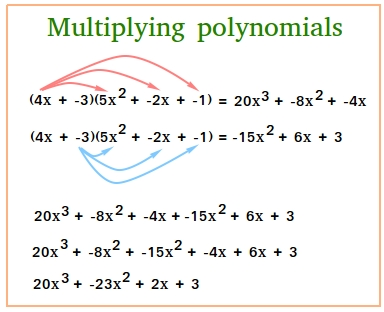

In the example above, you can see that the order of the result polynomial is 3. We can find this order by performing a simple calculation, without even doing the polynomial multiplication, by adding the orders of the two polynomials; the order of the first polynomial is 1 and the order of the second is 2, so the order of their product is 1 + 2 = 3. 

This is useful, since we can now initialize a list of zeros, representing the coefficient list for the result polynomial, by setting its length equal to the order + 1 (to take into account the $x^{0}$ term). Then, we can iterate through the coefficient lists of both polynomials, and add the product of their coefficients to the index of the result list corresponding to the sum of their indices (i + j). Finally, we can return the new Polynomial object using the coefficient list we just created.

In [5]:
def __mul__(self, other):
    power = (len(self.data) - 1) + (len(other.data) - 1) #determine order of product polynomial
    coeff = [0] * (power + 1) #initialize coefficient list
    for i in range(len(self.data)):
        for j in range(len(other.data)):
            coeff[i + j] += self.data[i] * other.data[j] #i+j represents the exponent/new index value  
    return Polynomial(coeff)

__f) A derive method that mutates the polynomial object to its derivative. You will have to implement the power rule. The modification must be in-place, which means you are not creating a new list with new values. More on Derivatives: https://www.khanacademy.org/math/ap-calculus-ab/ab-derivative-rules/ab-diff-negative-fraction-powers/a/power-rule-review.__
__For example, for the polynomial $2x^{4}$ - $9x^{3}$ + 7x + 3, the derive method will modify it to be: $8x^{3}$ - $27x^{2}$ + 7.__

To use the power rule in our code, we can start by iterating through the coefficient list and multiplying the coefficient by the exponent (power), starting with index 1 ($x^{1}$ term). Then we can use the pop method to get rid of the $0^{th}$ element of the list (constant). 

In [6]:
def derive(self):
    for i in range(1, len(self.data)):
        self.data[i] = self.data[i] * i
    self.data.pop(0)
    return self 

Putting the code all together along with some test code, we have the Polynomial Class as follows:

In [7]:
import math

class Polynomial:
    def __init__(self, data = [0]):
        self.data = data
    
    def __add__(self, other):
        sum_lst = []
        if len(self.data) > len(other.data):
            for i in range(len(other.data)):
                sum_lst.append(self.data[i] + other.data[i])
            for i in range(len(sum_lst), len(self.data)):
                sum_lst.append(self.data[i])
        else:
            for i in range(len(self.data)):
                sum_lst.append(self.data[i] + other.data[i])
            for i in range(len(sum_lst), len(other.data)):
                sum_lst.append(other.data[i])
        return Polynomial(sum_lst)
    
    def __call__(self, num):
        val = 0
        for i in range(len(self.data)):
            val += self.data[i] * (math.pow(num, i))
        return val
    
    def __repr__(self):
        print_lst = []
        for i in range(len(self.data) - 1, -1, -1):
            print_lst.append(str(self.data[i]) + "x^" + str(i))
        return ' + '.join(print_lst)
    
    def __mul__(self, other):
        power = (len(self.data) - 1) + (len(other.data) - 1)
        coeff = [0] * (power + 1)
        for i in range(len(self.data)):
            for j in range(len(other.data)):
                coeff[i + j] += self.data[i] * other.data[j]
        return Polynomial(coeff)
    
    def derive(self):
        for i in range(1, len(self.data)):
            self.data[i] = self.data[i] * i
        self.data.pop(0)
        return self 

#TEST CODE

#Constructor
poly1 = Polynomial([3, 7, 0, -9, 2]) 
print(poly1) #2x^4 - 9x^3 + 0x^2 + 7x + 3
poly2 = Polynomial([2, 0, 0, 5, 0, 0, 3])

#add operator
poly3 = poly1 + poly2 #3x^6 + 2x^4 - 4x^3 + 7x + 5
print(poly3.data) #[5, 7, 0, -4, 2, 0, 3]

#call operator
val1 = poly1(1)
print(val1) #3
val2 = poly2(1)
print(val2) #10
val3 = poly3(1)
print(val3) #13 (same result of 3 + 10; poly1(1) + poly2(1))

#mul operator
poly4 = Polynomial([2, 1]) #x + 2
poly5 = Polynomial([3, 1]) #x + 3
print(poly4 * poly5) #x^2 + 5x + 6
poly7 = Polynomial([0, 1, 5]) #5x^2 + x
poly8 = Polynomial([0, 1, 3, 0, 0, 0, 0, 0, 2]) #2x^8 + 3x^2 + x
print(poly7 * poly8)

#derive method
poly9 = Polynomial([3, 7, 0, -9, 2]) #2x^4 - 9x^3 + 7x + 3
print(poly9.derive()) #8x^3 -27x^2 + 7

2x^4 + -9x^3 + 0x^2 + 7x^1 + 3x^0
[5, 7, 0, -4, 2, 0, 3]
3.0
10.0
13.0
1x^2 + 5x^1 + 6x^0
10x^10 + 2x^9 + 0x^8 + 0x^7 + 0x^6 + 0x^5 + 15x^4 + 8x^3 + 1x^2 + 0x^1 + 0x^0
8x^3 + -27x^2 + 0x^1 + 7x^0
